# CISC 856: Reinforcement Learning
## Assignment 1: 2-Player Matrix Games
##### Hugh Morison (10179903)
##### Matthew Filipovich (20029031)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from policy_iteration import p1_rewards, p2_rewards, action_labels, games, normalize, play_game, update_policy, iterate, make_plots, make_trajectory_plots, statistics
%matplotlib inline

All the functional code for the report is implemented in `policy_iteration.py`. This report contains the code that defines the hyperparameters used in the iteration, such as the initial policies and the learning rate, as well as generates the plots. The report is broken down according to each game, and the questions (a)-(f) are answered for each one.

## Prisoner's Dilemma
The reward matrices for each player in the Prisoner's Dilemma game are given by:
$$R_1=\begin{bmatrix}5 & 0 \\ 10 & 1 \end{bmatrix}, R_2=\begin{bmatrix}5 & 10 \\ 0 & 1 \end{bmatrix}$$
Where for each player action 1 corresponds to lying to the police, while action 2 corresponds to confessing to the police. The players' policies in the game can thus be written as $p_i=(p_{lie},p_{confess}), i \in (1,2)$, where necessarily $p_{lie}+p_{confess}=1$.

a) 
Three different initial policies were used:
* Random distribution
* Both players tending to lie ($p_i=(0.8,0.2)$)
* Player 1 tending to lie, while player 2 tends to confess ($p_1=(0.8,0.2), p_2=(0.2,0.8)$)

Using each of these starting policies, simple policy iteration was performed using update rule #1. The results are plotted below for 10,000 iterations of policy updates and a learning rate of 0.005.

Results for random policies:


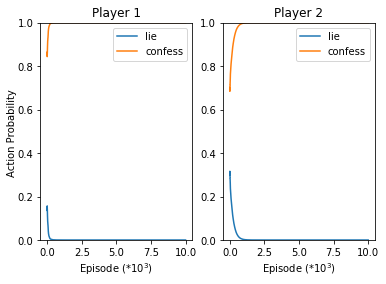

Results for both liars:


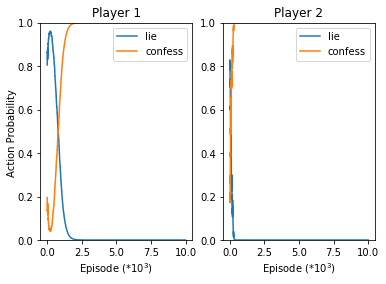

Results for criminal v rookie:


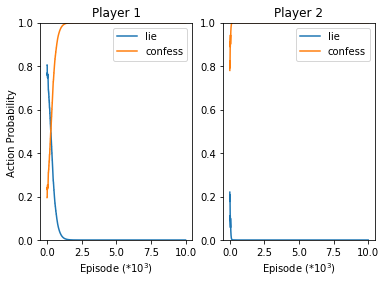

In [2]:
N=10000
ALPHA=0.005
rewards_1 = p1_rewards[0]
rewards_2 = p2_rewards[0]
labels = action_labels[0]

# random policies
policy_1 = normalize(np.random.random(2))
policy_2 = normalize(np.random.random(2))
p1_history, p2_history, Q1, Q2 = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=ALPHA, max_iterations=N)
print('Results for random policies:')
make_plots(p1_history, p2_history, labels)

# both tend to lie
policy_1 = np.array([0.8, 0.2])
policy_2 = np.array([0.8, 0.2])
p1_history, p2_history, Q1, Q2 = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=ALPHA, max_iterations=N)
print('Results for both liars:')
make_plots(p1_history, p2_history, labels)

# hardened criminal vs rookie
policy_1 = np.array([0.8, 0.2])
policy_2 = np.array([0.2, 0.8])
p1_history, p2_history, Q1, Q2 = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=ALPHA, max_iterations=N)
print('Results for criminal v rookie:')
make_plots(p1_history, p2_history, labels)

As can be seen from the above figures, both players' policies converge to confessing 100% of the time, regardless of the initial policy. This policy is given by $p_i=(1,0)$ for both players. The convergence is quite quick; both players have converged to this policy after around 1000 epsiodes.

b)


c) Using the same initial policies as in part (a), policy iteration was performed using update rule #2. The results are plotted below for 10,000 iterations of policy updates.

In order to ensure convergence using the modified algorithm, we implemented a variable learning rate that changes over the course of the iterations so that learning slows towards the end. The learning rate function used was $min(\alpha,\frac{5000\alpha}{N})$, where $N$ is the number of times an action has been taken.

Results for random policies:


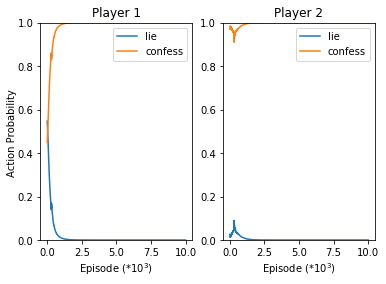

Results for both liars:


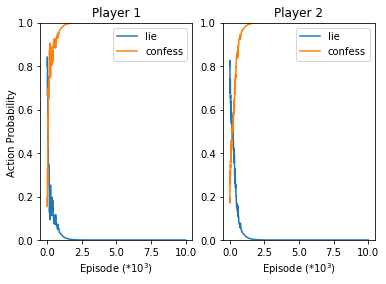

Results for criminal v rookie:


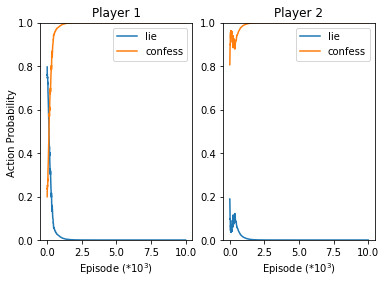

In [3]:
N=10000
ALPHA=0.005
rewards_1 = p1_rewards[0]
rewards_2 = p2_rewards[0]
labels = action_labels[0]

# random policies
policy_1 = normalize(np.random.random(2))
policy_2 = normalize(np.random.random(2))
p1_history, p2_history, Q1, Q2 = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=ALPHA, max_iterations=N, update_alg='modified')
print('Results for random policies:')
make_plots(p1_history, p2_history, labels)

# both tend to lie
policy_1 = np.array([0.8, 0.2])
policy_2 = np.array([0.8, 0.2])
p1_history, p2_history, Q1, Q2 = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=ALPHA, max_iterations=N, update_alg='modified')
print('Results for both liars:')
make_plots(p1_history, p2_history, labels)

# hardened criminal vs rookie
policy_1 = np.array([0.8, 0.2])
policy_2 = np.array([0.2, 0.8])
p1_history, p2_history, Q1, Q2 = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=ALPHA, max_iterations=N, update_alg='modified')
print('Results for criminal v rookie:')
make_plots(p1_history, p2_history, labels)

Using the new update rule, we can see that both players converged to the same policy as before, $p_i=(1,0)$. Once again, this corresponds to both players confessing to the police.

d)

e) The value of the game is given by the Q values for each player. These are printed below.

In [4]:
print(Q1)
print(Q2)

[0.46218487394957963, 1.098370610262109]
[0.46218487394957963, 1.098370610262109]


We can see from the value of the games for each player that the option to confess has a higher value than the value for lying.

f) For the Prisoner's Dilemma game, the optimal policy is arrived at regardless of the initial policy chosen. The only difference arises in the speed of convergence; the optimal policy is arrived at slightly quicker for the modified algorithm.

The updated algorithm gives some weight to the agent's past experience. This allows it converge quicker than if it operated solely on the current reward.

## Matching Pennies
The reward matrices for each player in the Matching Pennies game are given by:
$$R_1=\begin{bmatrix}1 & -1 \\ -1 & 1 \end{bmatrix}, R_2=\begin{bmatrix}-1 & 1 \\ 1 & -1 \end{bmatrix}$$
Where for each player action 1 corresponds to showing 'heads', while action 2 corresponds to showing 'tails'. The players' policies in the game can thus be written as $p_i=(p_{heads},p_{tails}), i \in (1,2)$, where necessarily $p_{heads}+p_{tails}=1$.

a) 
Three different initial policies were used:
* Random distribution
* Both players tending to show heads ($p_i=(0.8,0.2)$)
* Player 1 tending to show heads, while player 2 tends to show tails ($p_1=(0.8,0.2), p_2=(0.2,0.8)$)

Using each of these starting policies, simple policy iteration was performed using update rule #1. The results are plotted below for 50,000 iterations of policy updates and a learning rate of 0.001.


Results for random policies:


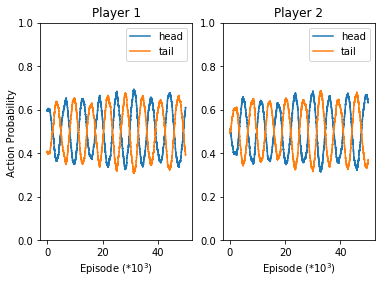

Results for both flipping heads:


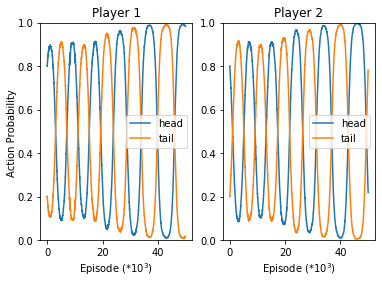

Results for heads v tails:


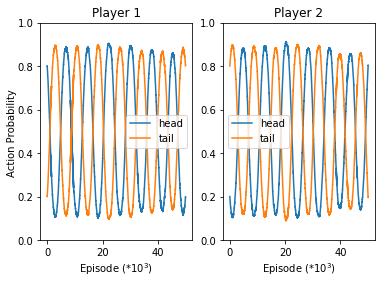

In [5]:
N = 50000 # Number of episodes
ALPHA = 0.001
rewards_1 = p1_rewards[1]
rewards_2 = p2_rewards[1]
labels = action_labels[1]

# random policies
policy_1 = normalize(np.random.random(2))
policy_2 = normalize(np.random.random(2))
p1_history, p2_history, Q1, Q2 = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=ALPHA, max_iterations=N)
print('Results for random policies:')
make_plots(p1_history, p2_history, labels)

# both tend to flip heads
policy_1 = np.array([0.8, 0.2])
policy_2 = np.array([0.8, 0.2])
p1_history, p2_history, Q1, Q2 = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=ALPHA, max_iterations=N)
print('Results for both flipping heads:')
make_plots(p1_history, p2_history, labels)

# heads flipped vs tails flipped
policy_1 = np.array([0.8, 0.2])
policy_2 = np.array([0.2, 0.8])
p1_history, p2_history, Q1, Q2 = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=ALPHA, max_iterations=N)
print('Results for heads v tails:')
make_plots(p1_history, p2_history, labels)

The above plots show that in this case, the policies do not converge to a steady value for the game. The agent in this case will continue to learn, putting too much emphasis on the recently received rewards, so the policy values will continuously oscillate.

b) It is impossible for the policy in this case to be optimal. Since the learning never stops, there is no convergence to a single policy. If we use a variable learning_rate, $\alpha$, to force the policy to converge, then we can use that policy and prove that it is sub-optimal.

c) Using the same initial policies as in part (a), policy iteration was performed using update rule #2. The results are plotted below for 10,000 iterations of policy updates.

The same variable learning rate was implemented here as in the modified algorithm for the Prisoner's Dilemma to ensure that learning slows down as time progresses.

Results for random policies:


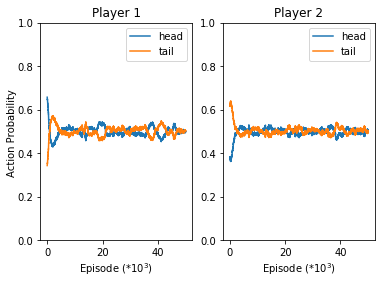

Results for both flipping heads:


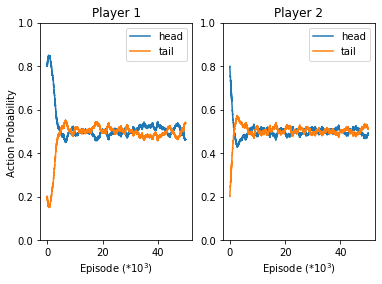

Results for heads v tails:


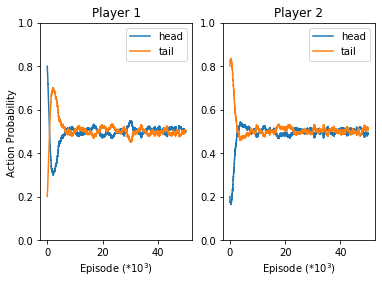

In [6]:
N = 50000 # Number of episodes
ALPHA = 0.001
rewards_1 = p1_rewards[1]
rewards_2 = p2_rewards[1]
labels = action_labels[1]

# random policies
policy_1 = normalize(np.random.random(2))
policy_2 = normalize(np.random.random(2))
p1_history, p2_history, Q1, Q2 = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=ALPHA, max_iterations=N, update_alg='modified')
print('Results for random policies:')
make_plots(p1_history, p2_history, labels)

# both tend to flip heads
policy_1 = np.array([0.8, 0.2])
policy_2 = np.array([0.8, 0.2])
p1_history, p2_history, Q1, Q2 = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=ALPHA, max_iterations=N, update_alg='modified')
print('Results for both flipping heads:')
make_plots(p1_history, p2_history, labels)

# heads flipped vs tails flipped
policy_1 = np.array([0.8, 0.2])
policy_2 = np.array([0.2, 0.8])
p1_history, p2_history, Q1, Q2 = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=ALPHA, max_iterations=N, update_alg='modified')
print('Results for heads v tails:')
make_plots(p1_history, p2_history, labels)

This time, since the update rule was changed, the policy converges to a steady state. Both players converge to the same policy, $p_i=(\frac{1}{2},\frac{1}{2})$, which indicates that they will choose between heads and tails with a 50% probability of choosing each.

d) This policy is intuitively the optimal policy for this game. Without any knowledge of what the other player is going to do, the best action is to choose randomly between the two. It can also be demonstrated that this is the optimal policy for this game.

e) The value of the game is given by the Q values for each player. These are printed below.

In [7]:
print(Q1)
print(Q2)

[-0.0007903216000972237, 0.0007699445245099349]
[-0.0007903216000972237, 0.0007699445245099349]


f) The results are different in this case because implementing the modified algorithm allows the agent to account for past experience while learning. This way, the agent does not just care about the immediate rewards, and so there is no oscillation as there is with the standard algorithm.

## Rock Paper Scissors

The reward matrices for each player in the Rock Paper Scissors game are given by:
$$R_1=\begin{bmatrix}0 & -1 & 1 \\ 1 & 0 & -1 \\ -1 & 1 & 0\end{bmatrix}, R_2=\begin{bmatrix}0 & 1 & -1 \\ -1 & 0 & 1 \\ 1 & -1 & 0\end{bmatrix}$$
Where for each player action 1 corresponds to throwing 'rock', action 2 corresponds to showing 'paper', and action 3 corresponds to throwing 'scissors'. The players' policies in the game can thus be written as $p_i=(p_{rock},p_{paper},p_{scissors}), i \in (1,2)$, where necessarily $p_{rock}+p_{paper}+p_{scissors}=1$.

a) 
Three different initial policies were used:
* Random distribution
* Both players tending to throw rock ($p_i=(0.8,0.1,0.1)$)
* Player 1 tending to throw paper, while player 2 tends to throw scissors ($p_1=(0.1,0.8,0.1), p_2=(0.1,0.1,0.8)$)

Using each of these starting policies, simple policy iteration was performed using update rule #1. The results are plotted below for 50,000 iterations and a learning rate of 0.001.


Results for random policies:


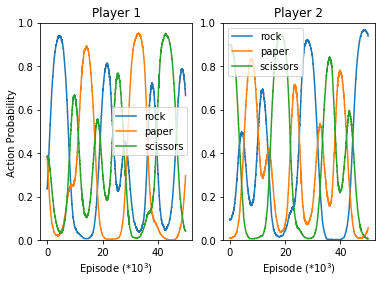

Results for rock preference:


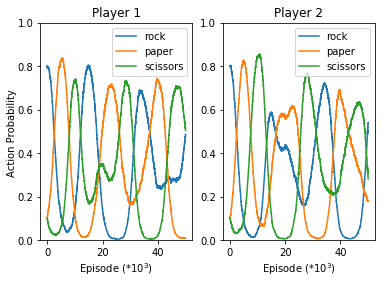

Results for paper v scissors:


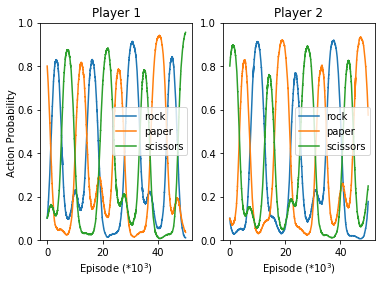

In [9]:
N = 50000 # Number of episodes
ALPHA = 0.001
rewards_1 = p1_rewards[2]
rewards_2 = p2_rewards[2]
labels = action_labels[2]

# random policies
policy_1 = normalize(np.random.random(3))
policy_2 = normalize(np.random.random(3))
p1_history, p2_history, _, _ = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=ALPHA, max_iterations=N)
print('Results for random policies:')
make_plots(p1_history, p2_history, labels)

# both tend to throw rock
policy_1 = np.array([0.8, 0.1, 0.1])
policy_2 = np.array([0.8, 0.1, 0.1])
p1_history, p2_history, Q1, Q2 = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=ALPHA, max_iterations=N)
print('Results for rock preference:')
make_plots(p1_history, p2_history, labels)

# one throws paper, one throws scissors
policy_1 = np.array([0.1, 0.8, 0.1])
policy_2 = np.array([0.1, 0.1, 0.8])
p1_history, p2_history, _, _ = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=ALPHA, max_iterations=N)
print('Results for paper v scissors:')
make_plots(p1_history, p2_history, labels)

The above plots show that in this case, the policies do not converge to a steady value for the game. The agent in this case will continue to learn, putting too much emphasis on the recently received rewards, so the policy values will continuously oscillate.

b) It is once again impossible for the policy to be optimal. Since the learning never stops, there is no convergence to a single policy. If we use a variable learning_rate,  𝛼 , to force the policy to converge, then we can use that policy and prove that it is sub-optimal.

c) Using the same initial policies as in part (a), policy iteration was performed using update rule #2. The results are plotted below for 50,000 iterations of policy updates.

The same variable learning rate was implemented here as in the modified algorithm for the Prisoner's Dilemma to ensure that learning slows down as time progresses.

Results for random policies:


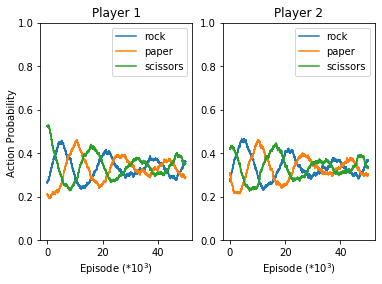

Results for rock preference:


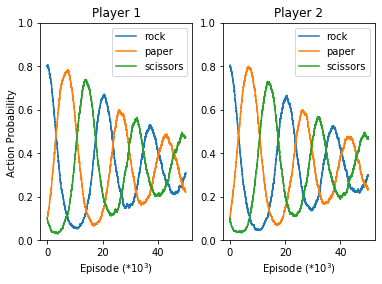

Results for paper v scissors:


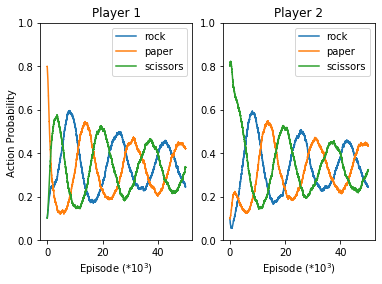

In [10]:
N = 50000 # Number of episodes
ALPHA = 0.001
rewards_1 = p1_rewards[2]
rewards_2 = p2_rewards[2]
labels = action_labels[2]

# random policies
policy_1 = normalize(np.random.random(3))
policy_2 = normalize(np.random.random(3))
p1_history, p2_history, Q1, Q2 = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=ALPHA, max_iterations=N, update_alg='modified')
print('Results for random policies:')
make_plots(p1_history, p2_history, labels)

# both tend to throw rock
policy_1 = np.array([0.8, 0.1, 0.1])
policy_2 = np.array([0.8, 0.1, 0.1])
p1_history, p2_history, Q1, Q2 = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=ALPHA, max_iterations=N, update_alg='modified')
print('Results for rock preference:')
make_plots(p1_history, p2_history, labels)

# one throws paper, one throws scissors
policy_1 = np.array([0.1, 0.8, 0.1])
policy_2 = np.array([0.1, 0.1, 0.8])
p1_history, p2_history, _, _ = iterate(policy_1, rewards_1, policy_2, rewards_2, alpha=ALPHA, max_iterations=N, update_alg='modified')
print('Results for paper v scissors:')
make_plots(p1_history, p2_history, labels)

After changing the policy update rule, the policy converges. The players converge to a policy, $p_i=(\frac{1}{3},\frac{1}{3},\frac{1}{3})$, indicating that they will choose rock, paper, or scissors with equal probability.

d) This policy is clearly the optimal for the game. Absent knowledge about what the other player is going to do, there is no benefit to preferentially throwing one option, so the optimal policy is to choose one of the three options indiscriminately.


e) The value of the game is given by the Q values for each player. These are printed below.

In [ ]:
print(Q1)
print(Q2)

We can see from the value of the games that all the options have an equal value. This is consistent with what was said earlier about the policy being optimal if it has equal probability for each action.

f)